# Titanic Kaggle Competition

### Read training and testing data

In [8]:
import pandas as pd
import numpy as np


# Read csv files
# These are of the type DataFrame
training_df = pd.read_csv('../data/train.csv')
testing_df = pd.read_csv('../data/test.csv')

# Display data in a nice table
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Display some of the info of our datasets
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Removing unnecessary data

We can remove columns that is going to be of no use to us. This includes things like name, and ticket number etc.

In [10]:
training_df = training_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
testing_df = testing_df.drop(['Name', 'Ticket'], axis=1)

#### Vlizualising our data and spotting trends

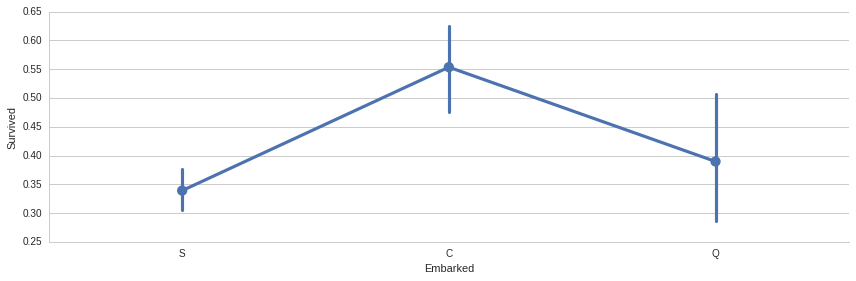

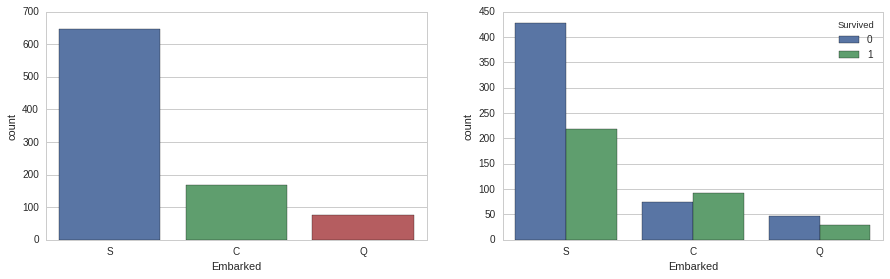

In [30]:
# Fill in missing values from the embarked column with the most common value that appears
training_df['Embarked'] = training_df['Embarked'].fillna('S')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.factorplot('Embarked', 'Survived', data=training_df,size=4,aspect=3)

figure = plt.figure(figsize=(15,9))

diagram1 = figure.add_subplot(221)
diagram2 = figure.add_subplot(222)

sns.countplot(x='Embarked', data=training_df, ax=diagram1)
sns.countplot(x='Embarked', hue='Survived', data=training_df, ax=diagram2)

In [41]:
# Get the average amount of people that survived in each group (S,C,V)

# First let's simplify our dataset by just getting the Embarked and Survived columns
embarked_and_survived = training_df[['Embarked', 'Survived']]

grouped = embarked_and_survived.groupby(['Embarked'], as_index=False)
grouped.mean().head()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [15]:
X_train = training_df.drop("Survived",axis=1)
Y_train = training_df["Survived"]
X_test  = testing_df.drop("PassengerId",axis=1).copy()

In [14]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

ValueError: could not convert string to float: Q